In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

C:\Users\User\AppData\Local\Temp\ipykernel_26656\3942176538.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Importing the dataset
df = pd.read_csv("C:\\Users\\User\\Desktop\\Drive D\\New folder\\ML\\Completed\\AirBnb.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-10,146.000000,165.000000,141.250000,144.710007,144.710007,70447500
1,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
2,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
3,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
4,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
5,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700
6,2020-12-18,150.449997,159.000000,150.300003,157.300003,157.300003,15954200
7,2020-12-21,155.309998,172.000000,145.110001,163.020004,163.020004,17788100
8,2020-12-22,170.000000,174.970001,161.050003,163.190002,163.190002,9872600
9,2020-12-23,162.813995,168.250000,155.500000,158.009995,158.009995,5852500


In [3]:
# Setting the date column as the index
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-10,146.000000,165.000000,141.250000,144.710007,144.710007,70447500
2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600


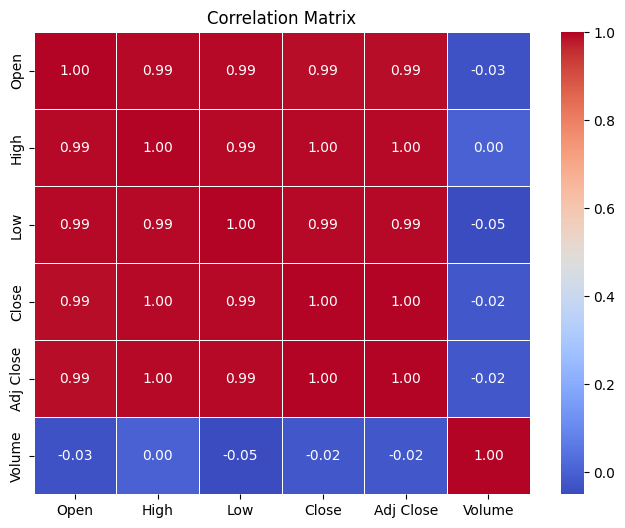

In [4]:
#Checking how closely the variables are related
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

* As we can see the correlation of **Volume** with other variables is almost closer to zero which suggests that there is a very little or no correlation of it with other variables so I will drop the **Volume** column in this case.

In [5]:
x = df.drop(columns = ['Adj Close','Volume'],axis=1)
x

,Open,High,Low,Close
Date,,,,
2020-12-10,146.000000,165.000000,141.250000,144.710007
2020-12-11,146.550003,151.500000,135.100006,139.250000
2020-12-14,135.000000,135.300003,125.160004,130.000000
2020-12-15,126.690002,127.599998,121.500000,124.800003
2020-12-16,125.830002,142.000000,124.910004,137.990005
...,...,...,...,...
2024-01-08,137.309998,140.250000,136.610001,140.080002
2024-01-09,138.520004,139.539993,137.789993,139.529999
2024-01-10,139.199997,140.824997,138.699997,139.759995


In [6]:
y = df['Adj Close']
y

Date
2020-12-10    144.710007
2020-12-11    139.250000
2020-12-14    130.000000
2020-12-15    124.800003
2020-12-16    137.990005
                 ...    
2024-01-08    140.080002
2024-01-09    139.529999
2024-01-10    139.759995
2024-01-11    139.449997
2024-01-12    137.139999
Name: Adj Close, Length: 777, dtype: float64

In [7]:
#Splitting the dataset into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# LinearRegression

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(x_train,y_train)

LinearRegression()

In [10]:
#Checking the model accuracy
pred = lr.predict(x_test)

In [11]:
mse = mean_squared_error(y_test, pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.158679973315723e-28


In [12]:
r2_score(y_test,pred)

1.0

In [13]:
# Step 3: Get the coefficients and intercept
coefficients = lr.coef_
intercept = lr.intercept_

# Step 4: Print the coefficients and intercept
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

# Step 5: Print the equation for linear regression
equation = f'y = {intercept} + {coefficients[0]} * x1 + {coefficients[1]} * x2 + {coefficients[2]} * x3'
print(f'Equation: {equation}')

Coefficients: [-1.96907242e-15  1.33226763e-15  1.38777878e-16  1.00000000e+00]
Intercept: 5.684341886080802e-14
Equation: y = 5.684341886080802e-14 + -1.9690724241644368e-15 * x1 + 1.3322676295501878e-15 * x2 + 1.3877787807814457e-16 * x3


# MultipleLinearRegression

In [15]:
x = sm.add_constant(x)

In [17]:
# Step 3: Fit the multiple linear regression model
model = sm.OLS(y, x).fit()

In [18]:
# Step 4: Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.389e+29
Date:                Wed, 31 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:26:28   Log-Likelihood:                 20907.
No. Observations:                 777   AIC:                        -4.180e+04
Df Residuals:                     772   BIC:                        -4.178e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.839e-13   9.05e-14      2.033      0.0